<h1 align="center">Spam Mail Prediction | Machine Learning</h1>

## PROJECT CONTENT

 [OVERVIEW](#1)

1. [Introduction](#2)
    * 1.1 [Importing Basic Python Libraries](#3)
    * 1.2 [Loading Dataset](#4)
    * 1.3 [Initial Analysis on Dataset](#5)
        * 1.3.1 [Analysis Outputs (1)](#6)
        
        
2. [Exploratory Data Analysis (EDA)](#7)
    * 2.1 [Under-Sampling Our DataSet](#8)
    * 2.2 [Label Encoding](#9)
    * 2.3 [Separating Train and Test DataSet](#10)
    * 2.4 [Feature Extraction](#11)
    
    

3. [Modelling](#12)
    * 3.1 [Logistic Regression Model](#13)
        * 3.1.1 [Logistic Regression Performance Evaluation](#14)
        * 3.1.2 [Hyperparameter Optimization (with GridSearchCV)](#15)
    * 3.2 [XGBoost Model](#16)
        * 3.2.1 [XGBoost Performance Evaluation](#17)
        
        
4. [Visualization](#18)
    * 4.1 [Visualizing the Data](#19)
    * 4.2 [Word Cloud](#20)
    
    
5. [Conclusion](#21)

## Overview<a id="1"></a>

**Enron Email Dataset** 

This dataset was collected and prepared by the CALO Project (A Cognitive Assistant that Learns and Organizes). It contains data from about 150 users, mostly senior management of Enron, organized into folders. The corpus contains a total of about 0.5M messages. This data was originally made public, and posted to the web, by the Federal Energy Regulatory Commission during its investigation.
The email dataset was later purchased by Leslie Kaelbling at MIT, and turned out to have a number of integrity problems. A number of folks at SRI, notably Melinda Gervasio, worked hard to correct these problems, and it is thanks to them (not me) that the dataset is available. The dataset here does not include attachments, and some messages have been deleted "as part of a redaction effort due to requests from affected employees". Invalid email addresses were converted to something of the form user@enron.com whenever possible (i.e., recipient is specified in some parse-able format like "Doe, John" or "Mary K. Smith") and to no_address@enron.com when no recipient was specified.



source: https://www.cs.cmu.edu/~./enron/

## INTRODUCTION <a id="2"></a>

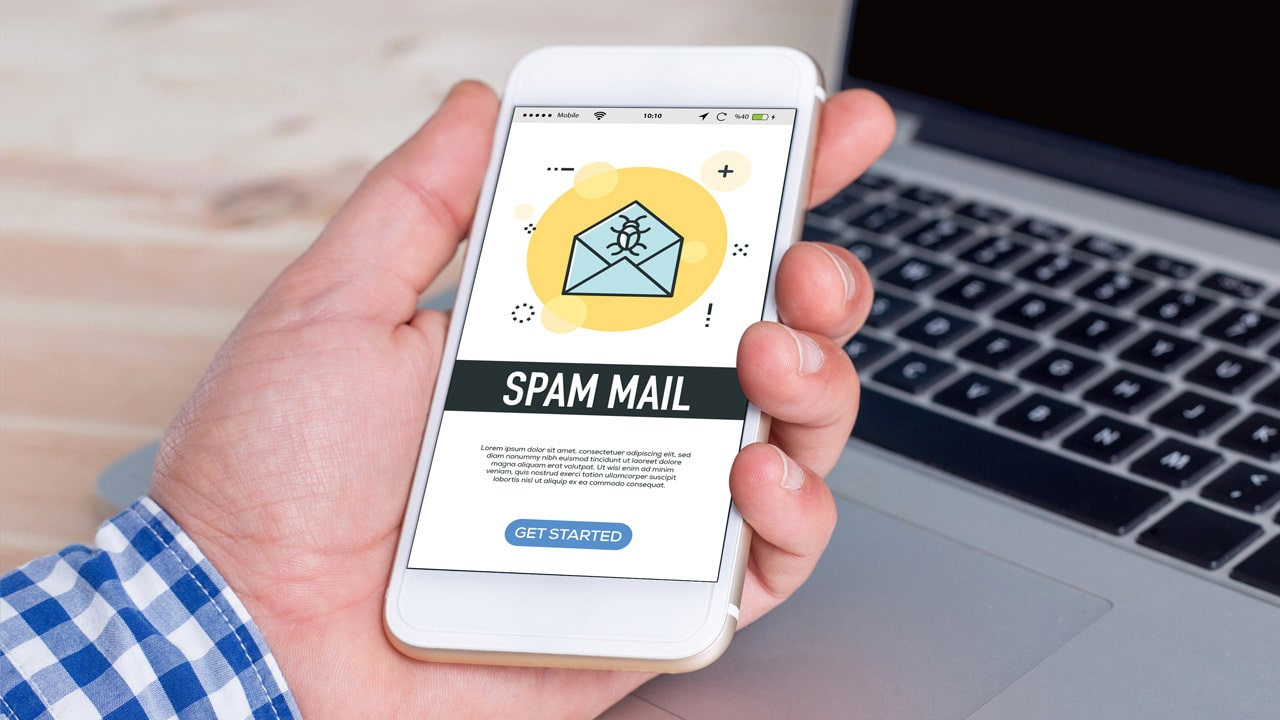


source: https://infotracer.com/img/email/email_spam_02.jpg

We will work on the process of building a ham/spam classifier using Enron email dataset, a collection of real-life ham and spam emails.

### 1.1 Importing Basic Python Libraries<a id="3"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### 1.2 Loading Dataset<a id="4"></a>

In [2]:
mail_df = pd.read_csv("/kaggle/input/maildataset/mail_data.csv")

### 1.3 Initial Analysis on DataSet<a id="5"></a>

In [3]:
mail_df.isnull().sum()

Category    0
Message     0
dtype: int64

In [4]:
mail_df.shape

(5572, 2)

In [5]:
mail_df["Category"].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

#### 1.3.1 Analysis Outputs (1)<a id="6"></a>

* There are no missing values in the dataset.

* Our dataset has 5572 Rows and 2 Columns.

* We have 4825 ham and 747 spams. So, the dataset is biased/imbalanced.
* Since the dataset is imbalanced, we having to balance it using "Under-Sampling".


* Under-Sampling: It decreases the number of rows where ham is present and makes it equal to spam.
* Over-Sampling: This will do the opposite............ So, we just under-sample our dataset.

## EXPLORATORY DATA ANALYSIS(EDA)<a id="7"></a>

### 2.1 Under-Sampling Our DataSet<a id="8"></a>

In [6]:
ham_col,spam_col = mail_df["Category"].value_counts()

ham_msg = mail_df[mail_df['Category'] == 'ham']
spam_msg = mail_df[mail_df['Category'] == 'spam']

#df_3 = c3.sample(class_1)
undersampled_ham = ham_msg.sample(spam_col)

In [7]:
undersampled_df = pd.concat([undersampled_ham,spam_msg], axis=0)

In [8]:
undersampled_df["Category"].value_counts()

Category
ham     747
spam    747
Name: count, dtype: int64

In [9]:
undersampled_df

,Category,Message
1133,ham,Good morning princess! How are you?
3762,ham,Was just about to ask. Will keep this one. May...
4231,ham,And several to you sir.
4540,ham,"Party's at my place at usf, no charge (but if ..."
5347,ham,No sir. That's why i had an 8-hr trip on the b...
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


### 2.2 Label Encoding<a id="9"></a>

**We will use LabelEncoder to change the Category column values from ham and spam to 0 and 1 respectively.**

In [10]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [11]:
undersampled_df["Category"] = label.fit_transform(undersampled_df["Category"])
undersampled_df

,Category,Message
1133,0,Good morning princess! How are you?
3762,0,Was just about to ask. Will keep this one. May...
4231,0,And several to you sir.
4540,0,"Party's at my place at usf, no charge (but if ..."
5347,0,No sir. That's why i had an 8-hr trip on the b...
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


**The dataset is not balanced because of the concatenation we did after under-sampling, all the ham rows are at the top while all the spam rows are at the bottom.**

**So, let's balance it...**

In [12]:
clean_df = undersampled_df.sample(frac = 1, random_state = 42).reset_index(drop = True)
clean_df.head(10)

,Category,Message
0,1,"URGENT, IMPORTANT INFORMATION FOR O2 USER. TOD..."
1,1,Panasonic & BluetoothHdset FREE. Nokia FREE. M...
2,1,Do you want a new Video handset? 750 any time ...
3,1,Hi if ur lookin 4 saucy daytime fun wiv busty ...
4,1,09066362231 URGENT! Your mobile No 07xxxxxxxxx...
5,0,Yeah we do totes. When u wanna?
6,0,Also maaaan are you missing out
7,0,I cant pick the phone right now. Pls send a me...
8,0,The fact that you're cleaning shows you know w...
9,0,Go fool dont cheat others ok


### 2.3 Separating Train and Test DataSet<a id="10"></a>

**Spliting the dataset into a training set(80%) and a testing set(20%).**

In [13]:
X = clean_df["Message"]
y = clean_df["Category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 21)

In [14]:
X_train.shape, X_test.shape

((1195,), (299,))

### 2.4 Feature Extraction<a id="11"></a>

* I will use the Term Frequency-Inverse Document Frequency(TF-IDF) vectorizer to convert the email text into a numeric format suitable for machine learning.

* The commented code below is just a demo of how the TF-IDF works.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

#corpus = [
 #   'This is the first document',
 #   'This document is the second document',
 #   'And this is the third one',
#    'Is this the first document?'
#]
#vectorizer = TfidfVectorizer()
#X = vectorizer.fit_transform(corpus)
#print(vectorizer.get_feature_names_out())

#X.toarray()

In [16]:
# min_df=1 ignores words that just appear once.
# stop_words='english' ignores all the common english words like ('a','the','and','is' etc)
# lowercase = True converts all the words in dataset to lowercase.
vectorizer = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = True)

In [17]:
new_X_train = vectorizer.fit_transform(X_train)

In [18]:
new_X_test = vectorizer.transform(X_test)

## MODELLING<a id="12"></a>

### 3.1 Logistic Regression Model<a id="13"></a>

In [19]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [20]:
log_reg.fit(new_X_train, y_train)

LogisticRegression()

In [21]:
new_X_train.shape,new_X_test.shape

((1195, 3722), (299, 3722))

In [22]:
log_pred = log_reg.predict(new_X_test)

#### 3.1.1 Logistic Regression Performance Evaluation<a id="14"></a>

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, log_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, log_pred))
print("Classification Report:")
print(classification_report(y_test, log_pred))

Accuracy: 0.9632107023411371
Confusion Matrix:
[[154   3]
 [  8 134]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       157
           1       0.98      0.94      0.96       142

    accuracy                           0.96       299
   macro avg       0.96      0.96      0.96       299
weighted avg       0.96      0.96      0.96       299



#### 3.1.2 Hyperparameter Optimization(with GridSearchCV)<a id="15"></a>

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
log_reg_new = LogisticRegression()
log_reg_new

LogisticRegression()

In [26]:
parameters = {"penalty":["l2"], "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [27]:
log_reg_grid = GridSearchCV(log_reg_new, param_grid = parameters)

In [28]:
log_reg_grid.fit(new_X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [29]:
print("Best Parameters: ", log_reg_grid.best_params_)

Best Parameters:  {'penalty': 'l2', 'solver': 'newton-cg'}


In [30]:
log_reg_new2 = LogisticRegression(penalty = "l2", solver = "newton-cg")
log_reg_new2

LogisticRegression(solver='newton-cg')

In [31]:
log_reg_new2.fit(new_X_train, y_train)

LogisticRegression(solver='newton-cg')

In [32]:
log2_pred = log_reg_new2.predict(new_X_test)

In [33]:
print("Accuracy:", accuracy_score(y_test, log2_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, log2_pred))
print("Classification Report:")
print(classification_report(y_test, log2_pred))

Accuracy: 0.9632107023411371
Confusion Matrix:
[[154   3]
 [  8 134]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       157
           1       0.98      0.94      0.96       142

    accuracy                           0.96       299
   macro avg       0.96      0.96      0.96       299
weighted avg       0.96      0.96      0.96       299



### 3.2 XGBoost Model<a id="16"></a>

In [34]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()

In [35]:
xgb_clf.fit(new_X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [36]:
y_pred_xgb = xgb_clf.predict(new_X_test)

#### 3.2.1 XGBoost Performance Evaluation<a id="17"></a>

In [37]:
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Accuracy: 0.9163879598662207
Confusion Matrix:
[[149   8]
 [ 17 125]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       157
           1       0.94      0.88      0.91       142

    accuracy                           0.92       299
   macro avg       0.92      0.91      0.92       299
weighted avg       0.92      0.92      0.92       299



## VISUALIZATION<a id="18"></a>

### 4.1 Visualizing the Data<a id="19"></a>

**Using matplotlib library to create a bar chart to visualize the number of ham and spam emails in the dataset.**

In [38]:
import matplotlib.pyplot as plt

In [39]:
#I will use mail_df to get the actual value, since the clean_df contains the undersampled data.

#Count the number of ham and spam emails
ham_count = mail_df[mail_df['Category'] == 'ham'].shape[0]
spam_count = mail_df[mail_df['Category'] == 'spam'].shape[0]

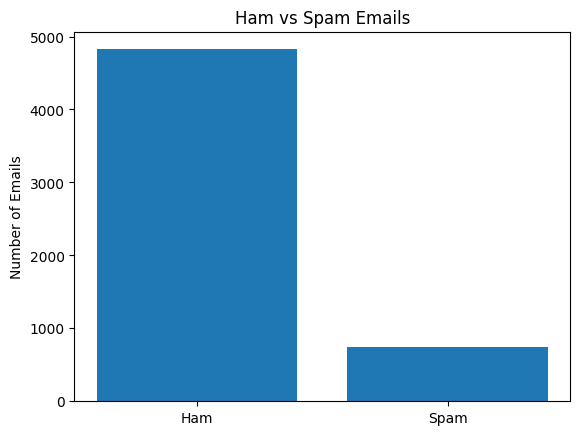

In [40]:
# Creating a bar chart
plt.bar(['Ham', 'Spam'], [ham_count, spam_count])
plt.ylabel('Number of Emails')
plt.title('Ham vs Spam Emails')
plt.show()

### 4.2 Word Cloud<a id="20"></a>

**I will use wordcloud library to create a word cloud for the spam emails.**

In [41]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [42]:
# Concatenate all spam email content into a single string
spam_text = ''.join(mail_df[mail_df['Category'] == 'spam']['Message'])

# Generating the word cloud
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', stopwords = stop_words).generate(spam_text)

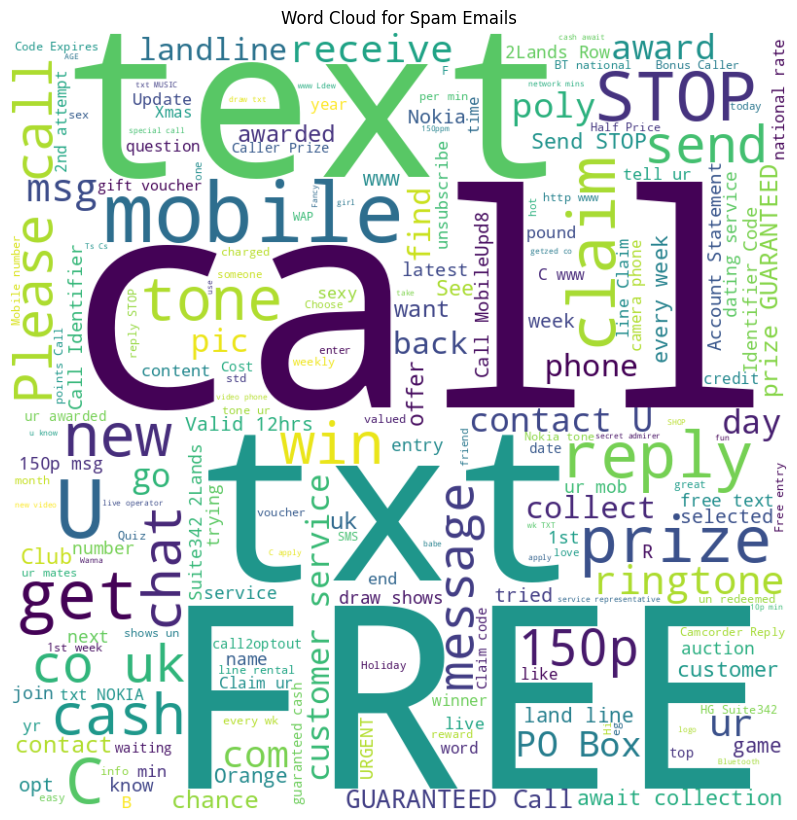

In [43]:
# Displaying the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Emails')
plt.tight_layout(pad = 0)
plt.show()

## CONCLUSION<a id="21"></a>

In this analysis, we used different machine learning algorithms to classify emails as ham or spam.

* For Logistic Regression, the model achieved an accuracy of 97%.

* The confusion matrix shows that out of the 157 actual ham emails. 154 were correctly classified as ham and 3 were misclassified as spam.

* Whereas, out of the 142 actual spam emails. 135 were correctly classified as spam and 7 were misclassified as ham.

* The classification report indicates that the model has high precision.

* The XGBoost model achieved an accuracy of 97%.

* The confusion matrix shows that out of 157 actual ham emails, 154 were correctly classified as ham and 3 were misclassified as spam.

* It also shows that out of the 142 actual spam emails, 135 were corrctly classified as spam and 7 were misclassified as ham.
